In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Lectura df procesado

In [3]:
df_processed = pd.read_csv('../data/processed/processed.csv')

In [4]:
df_processed.shape

(14548, 1155)

# Division Train y test a csv

In [5]:

train_df, test_df = train_test_split(df_processed, test_size=0.2, random_state=42)

In [6]:

def guardar_en_csv(df, ruta_destino):
   
    df.to_csv(ruta_destino, index=False)
    print(f"DataFrame guardado en {ruta_destino}")

In [7]:
# Split para parte de eval mod
guardar_en_csv(train_df,'../data/train/train_df.csv')
guardar_en_csv(test_df,'../data/test/test_df.csv')

DataFrame guardado en ../data/train/train_df.csv
DataFrame guardado en ../data/test/test_df.csv


In [8]:
X = df_processed.drop(['DELAYED','ARRIVAL_DELAY','DEPARTURE_TIME'], axis=1).copy()
y = df_processed['DELAYED'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Multicolinealidad del entrenamiento ojo
# ARRIVAL_DELAY: 0.16
# DEPARTURE_DELAY: 0.13
# Status: 0.08
# DEPARTURE_TIME: 0.05
# SCHEDULED_DEPARTURE: 0.05
# SCHEDULED_ARRIVAL: 0.05
# WHEELS_OFF: 0.04

## REGRESION LOGISTICA PRUEBA 1

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('lr', LogisticRegression(random_state=42, max_iter=1000))  # Clasificador Regresión logística
])

# Definir los hiperparámetros a ajustar
parameters = {
    'lr__C': [0.01, 0.001, 1],
    'lr__penalty': ['l1', 'l2'],
    'lr__fit_intercept': [True, False],
    'lr__solver': ['lbfgs', 'liblinear', 'sag']
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
lr1_model = grid_search.best_estimator_

print('lr1_model')
print(grid_search.best_params_)
# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = lr1_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')

# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = lr1_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')


Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.3s
[CV 2/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.4s
[CV 3/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.5s
[CV 4/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.4s
[CV 1/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.848 total time=   1.0s
[CV 2/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.861 total time=   1.0s
[CV 3/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.856 total time=   1.0s
[CV 4/4] END lr__C=0.01, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.856 total time=   1.0s
[CV 1/4] E

c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.967 total time=64.1min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.967 total time=94.9min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.970 total time=53.3min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=liblinear;, score=0.963 total time=99.4min
[CV 1/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=sag;, score=nan total time=   0.7s
[CV 2/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=sag;, score=nan total time=   0.6s
[CV 3/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=sag;, score=nan total time=   0.5s
[CV 4/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l1, lr__solver=sag;, score=nan total time=   0.5s
[CV 1/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=lbfgs;, score=0.938 total time=   3.3s
[CV 2/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=lbfgs;, score=0.940 total time=   3.3s
[CV 3/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=lbfgs;, score=0.944 total time=   3.1s
[CV 4/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=lbfgs;, score=0.935 total time=   3.2s
[CV 

c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=sag;, score=0.920 total time= 3.0min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=sag;, score=0.920 total time= 3.3min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=sag;, score=0.914 total time= 3.8min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END lr__C=1, lr__fit_intercept=True, lr__penalty=l2, lr__solver=sag;, score=0.911 total time= 4.7min
[CV 1/4] END lr__C=1, lr__fit_intercept=False, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.4s
[CV 2/4] END lr__C=1, lr__fit_intercept=False, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.6s
[CV 3/4] END lr__C=1, lr__fit_intercept=False, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.5s
[CV 4/4] END lr__C=1, lr__fit_intercept=False, lr__penalty=l1, lr__solver=lbfgs;, score=nan total time=   0.4s


## REGRESION LOGISTICA PRUEBA 2

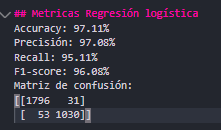

## Metricas Regresión logística
Accuracy: 97.11%
Precisión: 97.08%
Recall: 95.11%
F1-score: 96.08%
Matriz de confusión:
[[1796   31]
 [  53 1030]]

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('lr', LogisticRegression(random_state=42, max_iter=1000))  # Clasificador Regresión logística
])

# Definir los hiperparámetros a ajustar
parameters = {
    'lr__C': [0.1, 0.01],
    'lr__penalty': ['l1', 'l2'],
    'lr__fit_intercept': [True, False],
    'lr__solver': ['newton-cg', 'lbfgs']
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
lr2_model = grid_search.best_estimator_

print('lr1_model')
print(grid_search.best_params_)
# Evaluar el rendimiento del modelo en los datos de entrenamiento
y_train_pred = lr2_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en los datos de entrenamiento: {train_accuracy:.2f}')

# Evaluar el rendimiento del modelo en los datos de prueba
y_test_pred = lr2_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy en los datos de prueba: {test_accuracy:.2f}')
print(f'Precisión en los datos de prueba: {test_precision:.2f}')
print(f'Recall en los datos de prueba: {test_recall:.2f}')
print(f'F1-score en los datos de prueba: {test_f1:.2f}')
print('Matriz de confusión:')
print(confusion)

# Calcular el área bajo la curva ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........lr__C=0.1, lr__penalty=l1;, score=nan total time=   0.4s
[CV 2/5] END ...........lr__C=0.1, lr__penalty=l1;, score=nan total time=   0.4s
[CV 3/5] END ...........lr__C=0.1, lr__penalty=l1;, score=nan total time=   0.3s
[CV 4/5] END ...........lr__C=0.1, lr__penalty=l1;, score=nan total time=   0.4s
[CV 5/5] END ...........lr__C=0.1, lr__penalty=l1;, score=nan total time=   0.5s
[CV 1/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.887 total time=   1.2s
[CV 2/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.888 total time=   1.5s
[CV 3/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.892 total time=   1.5s
[CV 4/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.890 total time=   1.3s
[CV 5/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.896 total time=   1.3s
[CV 1/5] END .............lr__C=1, lr__penalty=l1;, score=nan total time=   0.3s
[CV 2/5] END .............lr__C=1, lr__penalty=l1

c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\si

Metricas Regresión logística
Accuracy: 97.11%
Precisión: 97.08%
Recall: 95.11%
F1-score: 96.08%
Matriz de confusión:
[[1796   31]
 [  53 1030]]


## REGRESION LOGISTICA PRUEBA 3

## best_lr_model
Accuracy: 98.08%
Precisión: 99.52%
Recall: 95.29%
F1-score: 97.36%
Matriz de confusión:
[[1822    5]
 [  51 1032]]

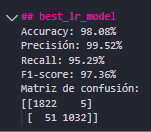

In [39]:
# Regresión logística 3
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('lr', LogisticRegression(random_state=42,solver='liblinear'))  # Clasificador Regresión logística
])

# Definir los hiperparámetros a ajustar
parameters = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy' , verbose=3)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_lr_model = grid_search.best_estimator_

print('Metricas Regresión logística')

# Predecir con el mejor modelo en los datos de prueba
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precisión: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("Matriz de confusión:")
print(confusion)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .........lr__C=0.1, lr__penalty=l1;, score=0.967 total time=  59.9s
[CV 2/5] END .........lr__C=0.1, lr__penalty=l1;, score=0.973 total time= 1.0min
[CV 3/5] END .........lr__C=0.1, lr__penalty=l1;, score=0.975 total time= 1.9min
[CV 4/5] END .........lr__C=0.1, lr__penalty=l1;, score=0.976 total time=  59.3s
[CV 5/5] END .........lr__C=0.1, lr__penalty=l1;, score=0.975 total time= 1.1min
[CV 1/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.887 total time=   5.8s
[CV 2/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.889 total time=   5.6s
[CV 3/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.891 total time=   4.8s
[CV 4/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.889 total time=   6.5s
[CV 5/5] END .........lr__C=0.1, lr__penalty=l2;, score=0.896 total time=   6.9s


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...........lr__C=1, lr__penalty=l1;, score=0.968 total time= 6.3min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........lr__C=1, lr__penalty=l1;, score=0.966 total time= 6.8min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........lr__C=1, lr__penalty=l1;, score=0.966 total time= 7.1min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........lr__C=1, lr__penalty=l1;, score=0.966 total time= 5.0min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...........lr__C=1, lr__penalty=l1;, score=0.961 total time= 6.9min
[CV 1/5] END ...........lr__C=1, lr__penalty=l2;, score=0.942 total time=  14.2s
[CV 2/5] END ...........lr__C=1, lr__penalty=l2;, score=0.936 total time=  11.9s
[CV 3/5] END ...........lr__C=1, lr__penalty=l2;, score=0.944 total time=  15.1s
[CV 4/5] END ...........lr__C=1, lr__penalty=l2;, score=0.938 total time=  12.4s
[CV 5/5] END ...........lr__C=1, lr__penalty=l2;, score=0.936 total time=  10.3s


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..........lr__C=10, lr__penalty=l1;, score=0.961 total time=19.4min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..........lr__C=10, lr__penalty=l1;, score=0.951 total time=17.5min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..........lr__C=10, lr__penalty=l1;, score=0.957 total time=17.7min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..........lr__C=10, lr__penalty=l1;, score=0.957 total time=20.5min


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..........lr__C=10, lr__penalty=l1;, score=0.953 total time=17.9min
[CV 1/5] END ..........lr__C=10, lr__penalty=l2;, score=0.965 total time=  34.6s
[CV 2/5] END ..........lr__C=10, lr__penalty=l2;, score=0.963 total time=  32.6s


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..........lr__C=10, lr__penalty=l2;, score=0.953 total time=  22.4s


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..........lr__C=10, lr__penalty=l2;, score=0.933 total time=  14.8s
[CV 5/5] END ..........lr__C=10, lr__penalty=l2;, score=0.963 total time=  39.2s
Metricas Regresión logística
Accuracy: 98.08%
Precisión: 99.52%
Recall: 95.29%
F1-score: 97.36%
Matriz de confusión:
[[1822    5]
 [  51 1032]]


In [ ]:
import pandas as pd

data = {'Model': ['Logistic Regression', 'best_lr_model'],
        'Accuracy': [97.11, 98.08],
        'Precision': [97.08, 99.52],
        'Recall': [95.11, 95.29],
        'F1-score': [96.08, 97.36]}

df = pd.DataFrame(data)

In [16]:


# Ordena las características por importancia
sorted_idx = np.argsort(importances)[::-1]
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.2f}")

ARRIVAL_DELAY: 0.16
DEPARTURE_DELAY: 0.13
Status: 0.08
DEPARTURE_TIME: 0.05
SCHEDULED_DEPARTURE: 0.05
SCHEDULED_ARRIVAL: 0.05
WHEELS_OFF: 0.04
TAXI_OUT: 0.04
ARRIVAL_TIME: 0.04
AL_Spirit Air Lines: 0.03
TAXI_IN: 0.03
WHEELS_ON: 0.03
DIVERTED: 0.02
CANCELLED: 0.02
ELAPSED_TIME: 0.02
OA_DAL: 0.01
DAY_OF_WEEK: 0.01
AIR_TIME: 0.01
AL_Delta Air Lines Inc.: 0.01
OA_LAS: 0.01
DA_13232: 0.01
DA_ALB: 0.01
OA_GPT: 0.01
DA_10821: 0.01
SCHEDULED_TIME: 0.00
OA_10397: 0.00
DA_11298: 0.00
lon: 0.00
lat: 0.00
OA_13204: 0.00
OA_PIT: 0.00
DA_ATL: 0.00
AL_Southwest Airlines Co.: 0.00
OA_CLT: 0.00
OA_MEI: 0.00
DA_10397: 0.00
OA_12264: 0.00
DA_MOB: 0.00
DA_MSN: 0.00
OA_DEN: 0.00
DA_13931: 0.00
DA_14869: 0.00
DA_11150: 0.00
OA_SMF: 0.00
DA_ANC: 0.00
OA_MHT: 0.00
AL_JetBlue Airways: 0.00
DA_14893: 0.00
DA_BRO: 0.00
DA_FSM: 0.00
OA_11193: 0.00
DA_12758: 0.00
DA_LGA: 0.00
DA_10800: 0.00
OA_MCO: 0.00
OA_ORD: 0.00
OA_14869: 0.00
DA_EWN: 0.00
DA_ORD: 0.00
DA_SLC: 0.00
DA_10685: 0.00
OA_14122: 0.00
OA_10721: 0.00


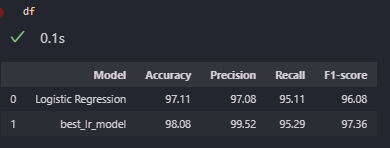

mejor best model

In [12]:
# Guardar el modelo entrenado en un archivo pickle
with open('../models/best_lr_model.pkl', 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)

# Guardar la configuración del modelo en un archivo YAML
model_config = {
    'model_name': 'Naive Bayes',
    'best_params': best_model.get_params()
}

with open('../models/best_lr_model.yaml', 'w') as f:
    yaml.dump(model_config, f)